In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()


df= pd.DataFrame(data= iris.data,
                  columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
target_names= {0: 'setosa',
               1: 'versicolor',
               2: 'virginica'}

In [9]:

df['target']= iris.target
df['target_names']= df['target'].map(target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df['target_names'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64

In [16]:
X= df.drop(['target' , 'target_names'] , axis=1)
y= df['target']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_scaled= scaler.fit_transform(X)

In [21]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 3)

pca_features= pca.fit_transform(X_scaled)


print('Shape before PCA: ', X_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df= pd.DataFrame(data= pca_features,
                    columns=['PC1' , 'PC2' , 'PC3'])


Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


### Map targets to Principal Components

In [22]:
target_names= {0: 'setosa',
               1: 'versicolor',
               2: 'virginica'}


pca_df['target']= y

pca_df['target']= pca_df['target'].map(target_names)

pca_df.head()

,PC1,PC2,PC3,target
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa


In [23]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

### Plot the explained variance

Text(0, 0.5, 'Eplained Variance')

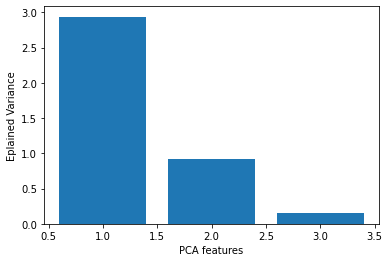

In [25]:
plt.bar(range(1 , len(pca.explained_variance_)+1),
       pca.explained_variance_)

plt.xlabel('PCA features')
plt.ylabel('Eplained Variance')


In [ ]:
# The output graph shows that we do not need 3 features,
# but only 2. The 3 feature’s variance is obviously not very significant.

## Reducing the three features into two features only

In [26]:
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(X_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


Text(0.5, 1.0, '2D PCA Graph')

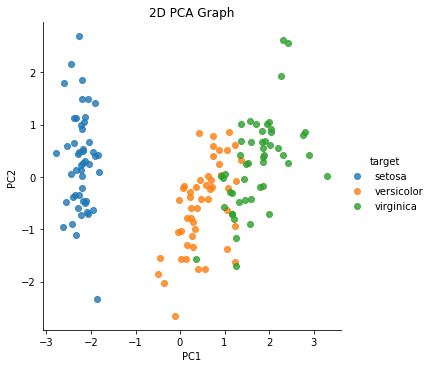

In [29]:
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')